# 0. 1초마다 입력

In [1]:
!pip install nengo

     |████████████████████████████████| 399kB 5.2MB/s 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import nengo
from nengo.dists import Choice
from nengo.utils.ensemble import tuning_curves
from nengo.utils.matplotlib import rasterplot

In [3]:
def input_one_hot(t):
    if(t % 1 == 0):
        return 1
    else:
        return 0

In [4]:
model = nengo.Network()

with model:
    input_node = nengo.Node(output=input_one_hot)
    pre_neuron = nengo.Ensemble(1, dimensions=1, max_rates = [100] * 1, intercepts=[0] * 1, radius=10)
    pre_neuron.encoders = Choice([[1]])
    
    nengo.Connection(input_node, pre_neuron)
 
    post_neuron = nengo.Ensemble(1, dimensions=1, max_rates = [90] * 1, intercepts=[0] * 1)
    post_neuron.encoders = Choice([[1]])
        
    nengo.Connection(pre_neuron, post_neuron, transform=1, synapse=0.02)
    
    input_p = nengo.Probe(input_node)
    pre_p = nengo.Probe(pre_neuron.neurons, 'voltage')
    post_p = nengo.Probe(post_neuron.neurons, 'voltage')
    pre_spike_p = nengo.Probe(pre_neuron.neurons)
    post_spike_p = nengo.Probe(post_neuron.neurons)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

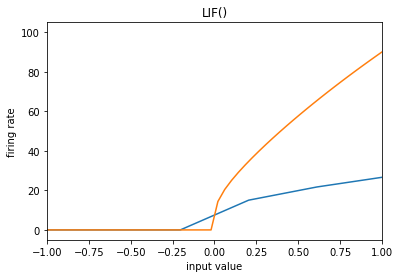

In [5]:
with nengo.Simulator(model) as sim: # this is the only line that changes
    plt.figure()
    plt.plot(*tuning_curves(pre_neuron, sim))
    plt.plot(*tuning_curves(post_neuron, sim))
    plt.xlabel("input value")
    plt.ylabel("firing rate")
    plt.xlim(-1, 1)
    plt.title(str(nengo.LIF()))
    sim.run(5.0)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

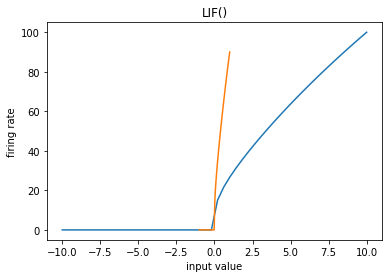

In [6]:
with nengo.Simulator(model) as sim:
    plt.figure()
    plt.plot(*tuning_curves(pre_neuron, sim))
    plt.plot(*tuning_curves(post_neuron, sim))
    plt.xlabel("input value")
    plt.ylabel("firing rate")
    plt.title(str(nengo.LIF()))
    sim.run(5.0)

In [7]:
with nengo.Simulator(model) as sim:
    sim.run(10.0)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

(0.0, 10.0)

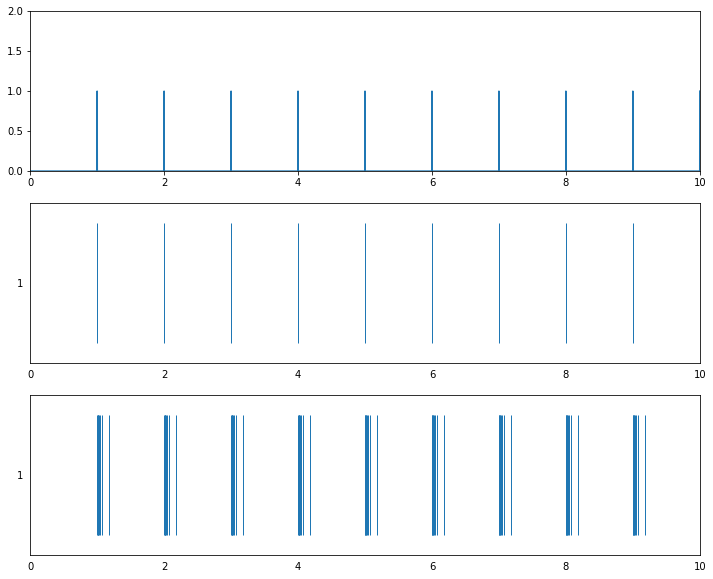

In [8]:
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.plot(sim.trange(), sim.data[input_p])
plt.ylim(0, 2)
plt.xlim(0, 10)

plt.subplot(3, 1, 2)
rasterplot(sim.trange(), sim.data[pre_spike_p])
plt.xlim(0, 10)

plt.subplot(3, 1, 3)
rasterplot(sim.trange(), sim.data[post_spike_p])
plt.xlim(0, 10)

(0.0, 10.0)

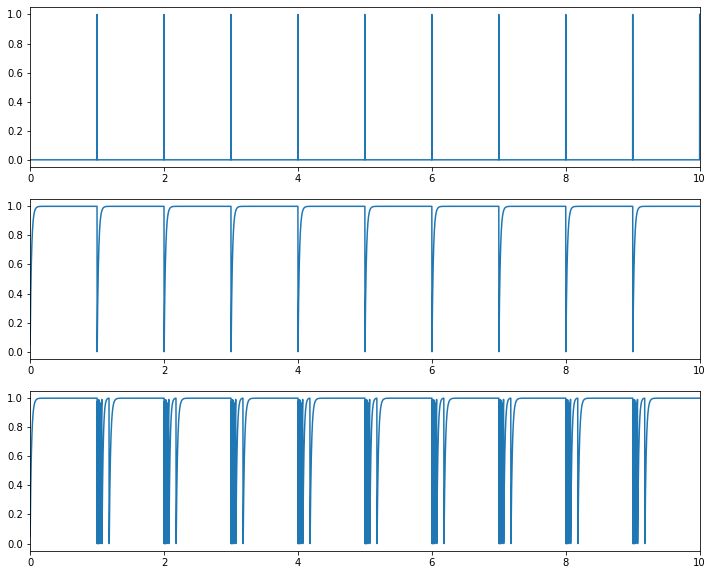

In [9]:
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.plot(sim.trange(), sim.data[input_p])
plt.xlim(0, 10)

plt.subplot(3, 1, 2)
plt.plot(sim.trange(), sim.data[pre_p])
plt.xlim(0, 10)

plt.subplot(3, 1, 3)
plt.plot(sim.trange(), sim.data[post_p])
plt.xlim(0, 10)

# 1. 음성 데이터 입력

In [10]:
pip install numba==0.50.0 librosa==0.5.1

     |████████████████████████████████| 3.6MB 4.6MB/s 
     |████████████████████████████████| 1.5MB 23.2MB/s 
     |████████████████████████████████| 18.3MB 199kB/s 
  Created wheel for librosa: filename=librosa-0.5.1-cp36-none-any.whl size=1547565 sha256=8a7211b32556ca757c419a44cc7c528d6a3b745341e0f580a8693558f1bde5d3
  Stored in directory: /root/.cache/pip/wheels/f6/21/55/9c17b30d30ef57e74b50c8824c2bb368d58ddabf9bf8e1fee0
Successfully built librosa
  Found existing installation: llvmlite 0.31.0
    Uninstalling llvmlite-0.31.0:
      Successfully uninstalled llvmlite-0.31.0
  Found existing installation: numba 0.48.0
    Uninstalling numba-0.48.0:
      Successfully uninstalled numba-0.48.0
  Found existing installation: librosa 0.6.3
    Uninstalling librosa-0.6.3:
      Successfully uninstalled librosa-0.6.3


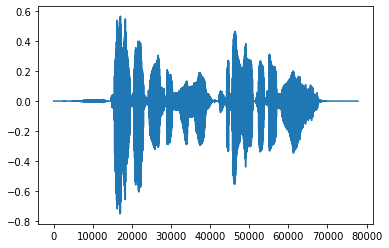

In [12]:
import librosa
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
  
%matplotlib inline
 
audio_path = '/content/4_3273.wav'
 
y, sr = librosa.load(audio_path)
 
plt.figure()
plt.plot(y)

In [13]:
time_duration = int(librosa.get_duration(y=y, sr=sr) * 1000)
data_length = y.shape[0]
print("time duration: " + str(time_duration) + " ms")
print("sampling rate: " + str(sr))
print("data length: " + str(data_length))

time duration: 3529 ms
sampling rate: 22050
data length: 77824


In [14]:
def voice_input(t):
    ms = t * 1000
    voice = y[int((data_length / time_duration) * int(ms))]
    return voice

In [15]:
model = nengo.Network()

with model:
    voice = nengo.Node(voice_input)
    A = nengo.Ensemble(80, dimensions=1)
    nengo.Connection(voice, A, synapse=0.01)
    
    p = nengo.Probe(A, synapse=0.01)
    inp_p = nengo.Probe(voice)
    spike_p = nengo.Probe(A.neurons)
    voltage_p = nengo.Probe(A.neurons, 'voltage')

In [16]:
with nengo.Simulator(model) as sim:
    sim.run(int(time_duration-1) / 1000)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

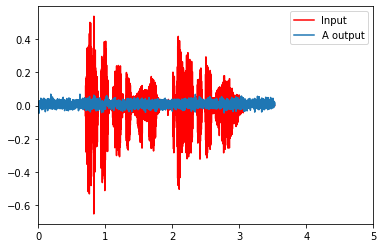

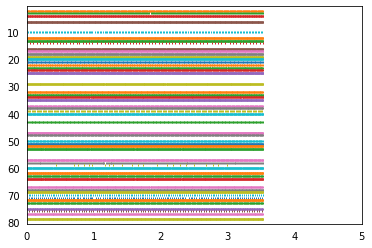

In [17]:
plt.figure()
plt.plot(sim.trange(), sim.data[inp_p], 'r', label="Input")
plt.plot(sim.trange(), sim.data[p], label="A output")
plt.xlim(0, 5)
plt.legend()
 
plt.figure()
rasterplot(sim.trange(), sim.data[spike_p])
plt.xlim(0, 5);

# 2. Image 입력

In [44]:
%matplotlib inline
 
import gzip
import pickle
from urllib.request import urlretrieve
import zipfile
 
import nengo
import numpy as np
import matplotlib.pyplot as plt
from nengo.dists import Choice
from nengo.utils.ensemble import tuning_curves
from nengo.utils.matplotlib import rasterplot
 
urlretrieve("http://deeplearning.net/data/mnist/mnist.pkl.gz", "mnist.pkl.gz")
with gzip.open("mnist.pkl.gz") as f:
    train_data, _, test_data = pickle.load(f, encoding="latin1")
train_data = list(train_data)
test_data = list(test_data)

In [45]:
data = train_data
print(data[0].shape)#  784개의 값을 가지는 array 50000개
print(data[0].shape[0])

(50000, 784)
50000


In [46]:
one_hot = np.zeros((data[0].shape[0], 10)) # one_hot.shpae = (50000, 10) --> 10개의 데이터 값을 가지는 array 50000개가 0으로 초기화

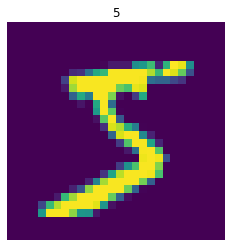

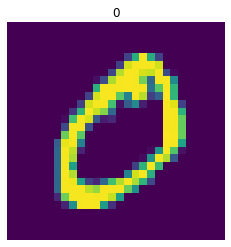

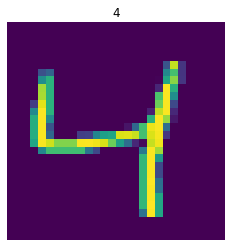

In [47]:
for data in (train_data, test_data):
    one_hot = np.zeros((data[0].shape[0], 10))
    one_hot[np.arange(data[0].shape[0]), data[1]] = 1
    data[1] = one_hot
 
for i in range(3):
    plt.figure()
    plt.imshow(np.reshape(train_data[0][i], (28, 28)))
    plt.axis('off')
    plt.title(str(np.argmax(train_data[1][i])));

In [102]:
def image_input(t):
    img = train_data[0][int(t)]
    return img

In [103]:
model = nengo.Network()

neuron_number = 28*28

with model:
    input_node = nengo.Node(image_input)
    pre_neuron = nengo.Ensemble(neuron_number, dimensions=neuron_number, max_rates = [100] * neuron_number, intercepts=[0] * neuron_number)
    nengo.Connection(input_node, pre_neuron)
             
    input_p = nengo.Probe(input_node)
    pre_p = nengo.Probe(pre_neuron.neurons, 'voltage')
    pre_spike_p = nengo.Probe(pre_neuron.neurons)


In [104]:
with nengo.Simulator(model) as sim:
    sim.run(10)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

(0.0, 10.0)

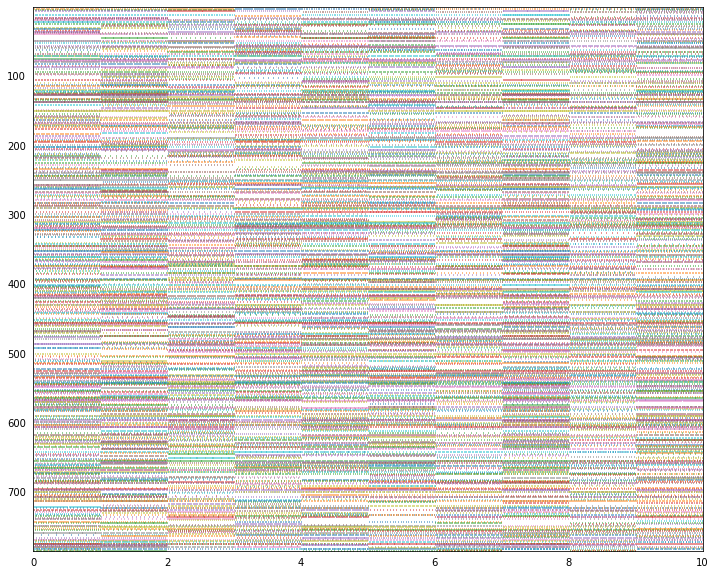

In [106]:
plt.figure(figsize=(12, 10))

plt.subplot(1, 1, 1)
rasterplot(sim.trange(), sim.data[pre_spike_p])
plt.xlim(0, 10)


# 3. Image 와 Label 입력

In [107]:
def label_input(t):
    label = train_data[1][int(t)]
    return label

In [108]:
model = nengo.Network()

neuron_number = 28*28
label_numer = 10

with model:
    input_node = nengo.Node(image_input)
    pre_neuron = nengo.Ensemble(neuron_number, dimensions=neuron_number, max_rates = [100] * neuron_number, intercepts=[0] * neuron_number)
    nengo.Connection(input_node, pre_neuron)

    label_node = nengo.Node(label_input)
    post_neuron = nengo.Ensemble(label_numer, dimensions=label_numer, max_rates = [100] * label_numer, intercepts=[0] * label_numer, radius = 1)
    nengo.Connection(label_node, post_neuron)

    input_p = nengo.Probe(input_node)
    label_p = nengo.Probe(label_node)
    pre_p = nengo.Probe(pre_neuron.neurons, 'voltage')
    post_p = nengo.Probe(post_neuron.neurons, 'voltage')
    pre_spike_p = nengo.Probe(pre_neuron.neurons)
    post_spike_p = nengo.Probe(post_neuron.neurons)


In [109]:
with nengo.Simulator(model) as sim:
    sim.run(10)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

(0.0, 10.0)

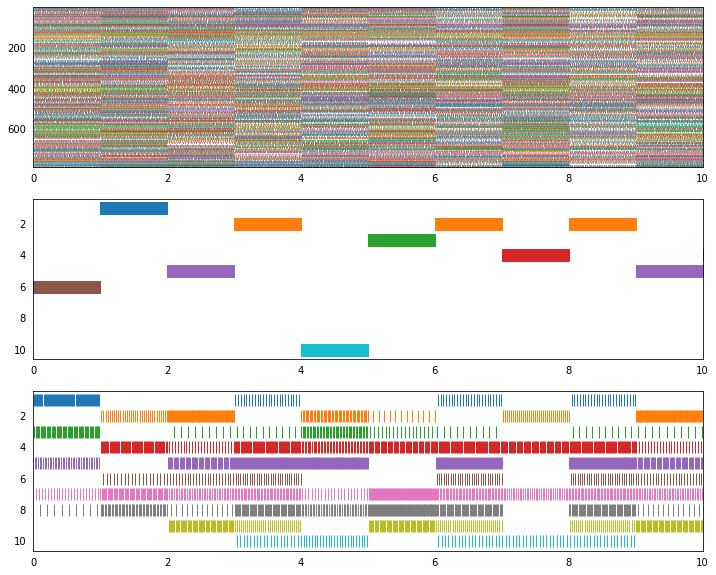

In [110]:
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
rasterplot(sim.trange(), sim.data[pre_spike_p])
plt.xlim(0, 10)

plt.subplot(3, 1, 2)
rasterplot(sim.trange(), sim.data[label_p])
plt.xlim(0, 10)

plt.subplot(3, 1, 3)
rasterplot(sim.trange(), sim.data[post_spike_p])
plt.xlim(0, 10)